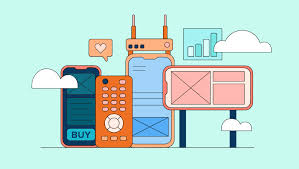

Analyzing social media advertisements involves evaluating them to determine whether the intended audience is likely to make a purchase. This application of data science in marketing offers valuable insights into consumer behavior and preferences.
I acquired the dataset for the Social Media Ads Classification project from Kaggle. This dataset provides information regarding a product's social media ad campaign, including details such as  

*   the age
*   the estimated salary
*   whether they purchased the product or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Ananyasiingh/Data/main/social.csv")
print(data.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:
print(data.size)

1200


In [4]:
print(data.describe())
print(data.isnull().sum()) #hence no null values

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


Visualisations


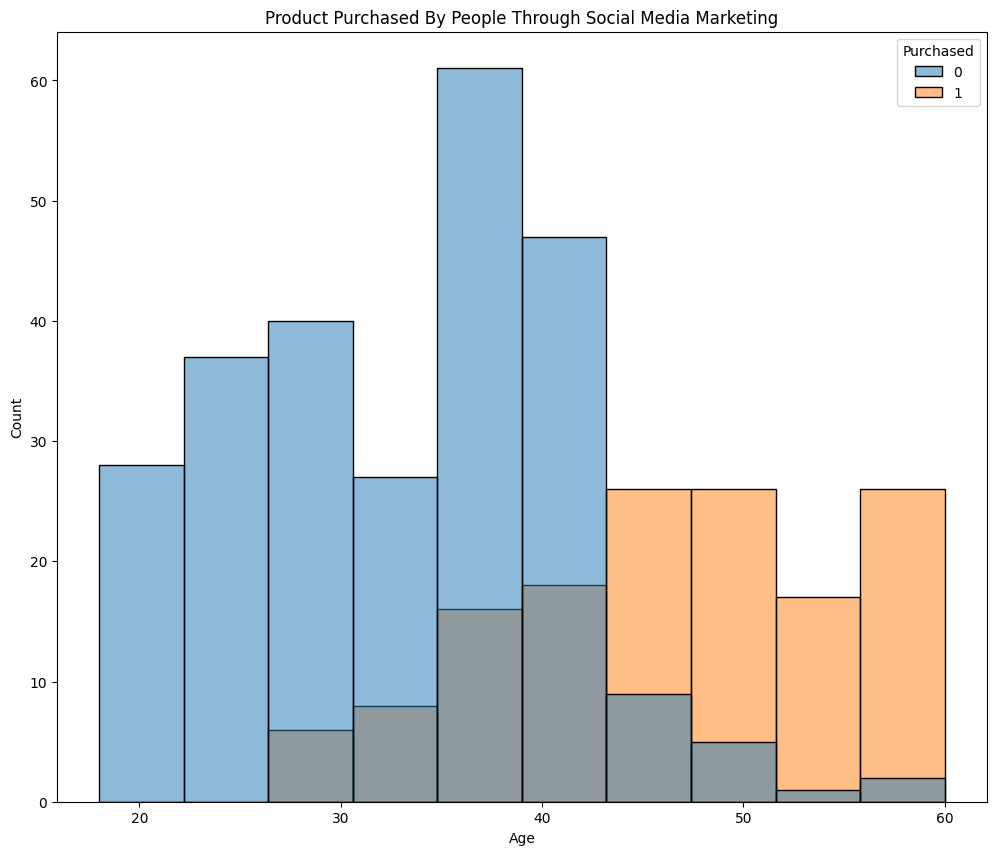

In [5]:
plt.figure(figsize=(12,10)) #input format- weight and height i.e. 12 inches and 10 inches
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(data=data, x="Age", hue="Purchased")
plt.show()

Thus people above 45 are more into purchasing the product. And what about their income? Could we take a look at that as well?


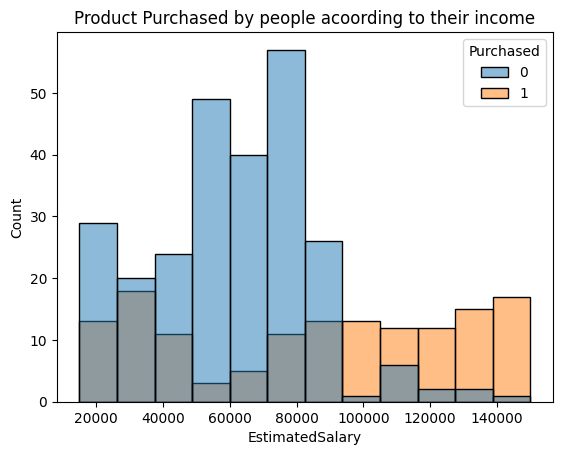

In [6]:
plt.title("Product Purchased by people acoording to their income")
sns.histplot(data = data, x = "EstimatedSalary", hue = "Purchased")
plt.show()

So, people with a monthly income above 90,000 among the target audience are more interested in purchasing the product.

**Model Training**
Here, I'll set the Purchased column in the dataset as the target variable and the other two columns as the features we need to train a model.

In [7]:
x = np.array(data[["Age", "EstimatedSalary"]])
y = np.array(data[["Purchased"]])

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.10,random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [9]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.71      0.77      0.74        13

    accuracy                           0.82        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.83      0.82      0.83        40

